<a href="https://colab.research.google.com/github/gndede/python/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc

import statsmodels.api as sm #statical modeling
from sklearn.model_selection import train_test_split

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#data = pd.read_csv("/Users/gndede/downloads/titanic_log-1.csv")
data = pd.read_csv("/content/titanic.csv")

In [4]:
#1:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#2: Display the counts for the number nulls in the data & drop any missing data.
# missing values
data.isna().sum()
#data.shape

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data = data.dropna() # drop missing values
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

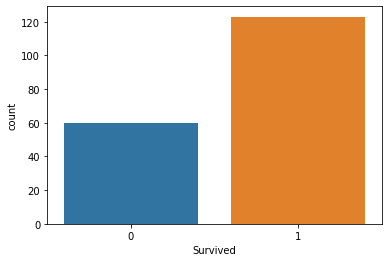

In [9]:
#3: Create a sns counplot of the Survived column
sns.countplot(x=data.Survived)

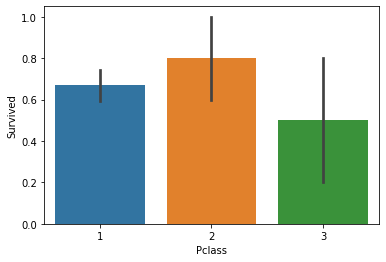

In [16]:
sns.barplot(x=data.Pclass, y=data.Survived)

In [17]:
#4: Describe the age column
data["Age"].describe

<bound method NDFrame.describe of 1      38.0
3      35.0
6      54.0
10      4.0
11     58.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 183, dtype: float64>

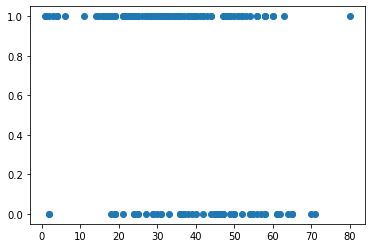

In [18]:
#5: Create a scatterplot for age and survived
plt.scatter(x=data.Age,y=data.Survived)

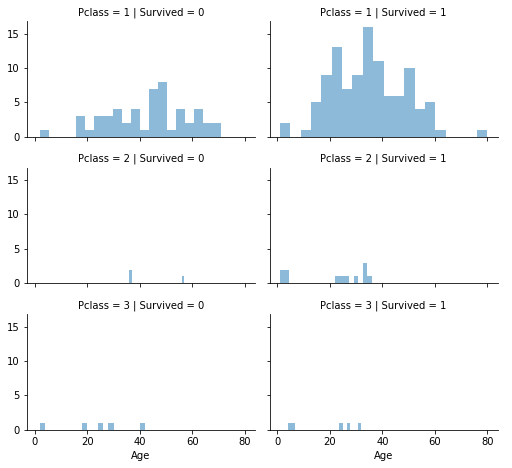

In [19]:
#6: 
# By age and by Pclass
grid = sns.FacetGrid(data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**What are bins in hist?**
A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin. Bins are also sometimes called "intervals", "classes", or "buckets".

In [20]:
#7:
# Feature Recode: Male = 1, Female = 2 for regression
dict = {'male' : '1', 'female' : '2'} 
print(dict)

{'male': '1', 'female': '2'}


In [21]:
data['SexNum']= data['Sex'].map(dict) 
data['SexNum'] =  data['SexNum'].astype('int')  # change object to int

In [22]:
# Feature Selection
features = data[['Pclass','SexNum', 'Age','SibSp']]
target = data.Survived
features.corr()

,Pclass,SexNum,Age,SibSp
Pclass,1.000000,0.046181,-0.306514,-0.103592
SexNum,0.046181,1.000000,-0.184969,0.104291
Age,-0.306514,-0.184969,1.000000,-0.156162
SibSp,-0.103592,0.104291,-0.156162,1.000000


In [23]:
# 8
# split the data
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=1)

In [25]:
# 9:
# split the data
#formula = 'Survived ~ C(Pclass) + SexNum + Age + SipSp'
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SipSp'
formula

'Survived ~ C(Pclass) + C(Sex) + Age + SipSp'

In [27]:
#10: Display summary of the model
logitfit = sm.Logit(y_train, x_train, formula = str(formula)).fit()
#if you want a thorough explanation of the summary = https://stats.idre.ucla.edu/stata/output/logistic-regression-analysis/
logitfit.summary()

Optimization terminated successfully.
         Current function value: 0.408587
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  137
Model:                          Logit   Df Residuals:                      133
Method:                           MLE   Df Model:                            3
Date:                Sun, 31 Oct 2021   Pseudo R-squ.:                  0.3546
Time:                        21:04:51   Log-Likelihood:                -55.976
converged:                       True   LL-Null:                       -86.733
Covariance Type:            nonrobust   LLR p-value:                 2.792e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.3744      0.453     -3.032      0.002      -2.263      -0.486
SexNum         3.4073      0.652      5.223      0.000       2.129       4.686
Age           -0.0520      0.012     -4.295      0.000      -0.076      -0.028
SibSp         -0.1800      0.377     -0.477      0.633      -0.919       0.559
==============================================================================
"""

In [ ]:
#11: Calculate the y predicted values with your logistic model
#12: Round y_pred and save the values in y_pred.
#13: Calculate the model residuals
# apply model to test data & calculate residuals
y_pred = np.round(logitfit.predict(x_test))
residuals = y_test - y_pred
residuals

In [30]:
print('Mean of residuals =', np.mean(residuals))

Mean of residuals = -0.043478260869565216


In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.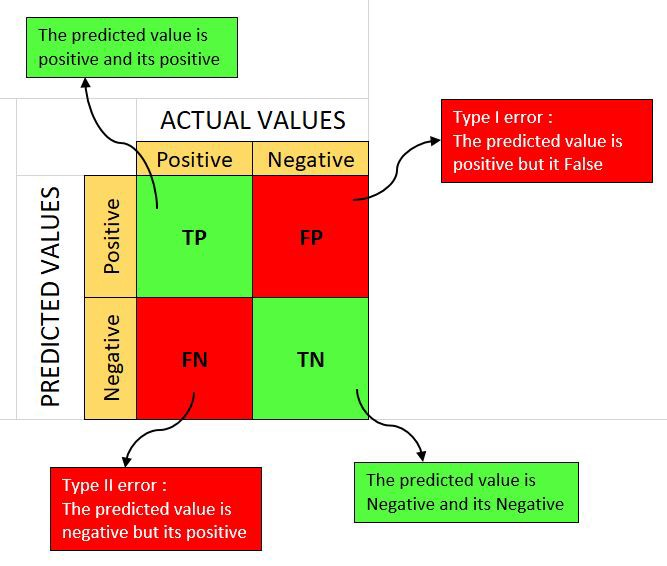

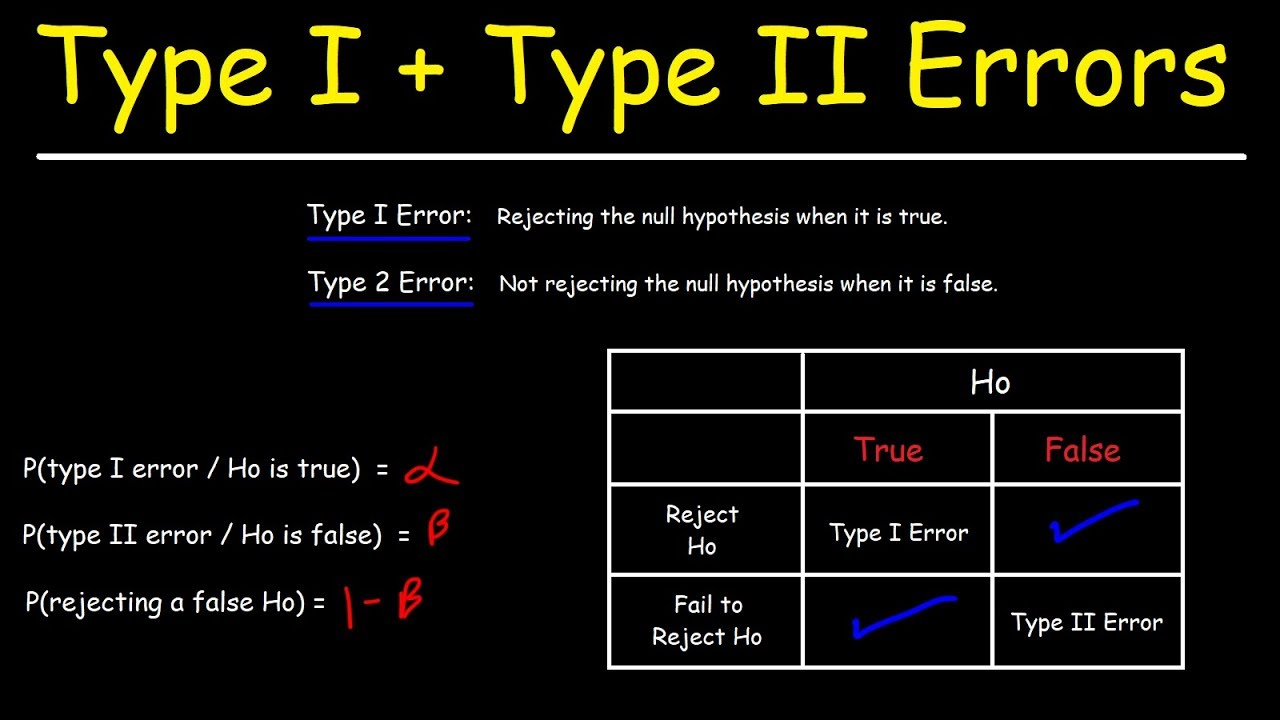

There are two errors that could potentially occur: Type I error (false positive): the test result says you have coronavirus, but you actually don't. Type II error (false negative): the test result says you don't have coronavirus, but you actually do.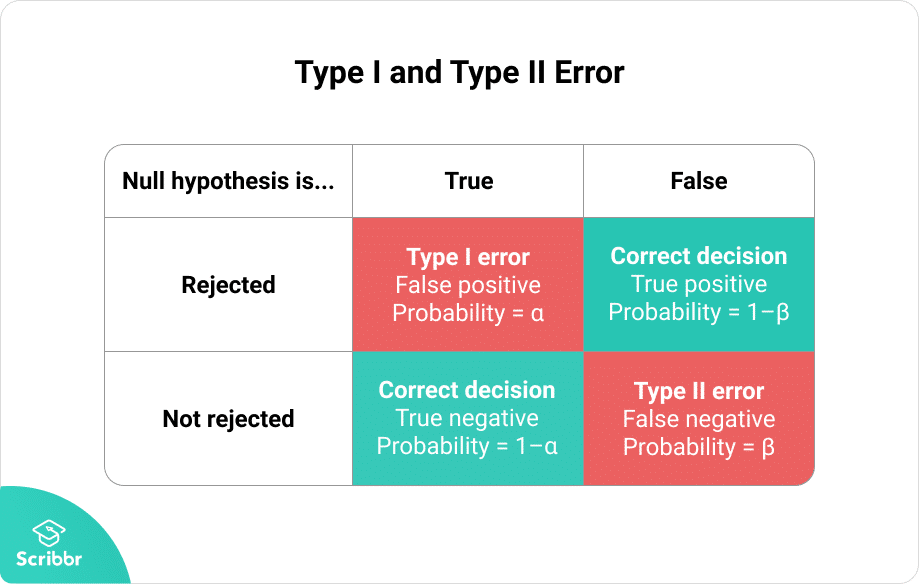

In [31]:
#14:
# confusion matrix 

cm = pd.crosstab(y_test,y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 col_0     0.0  1.0
Survived          
0           7    8
1           6   25


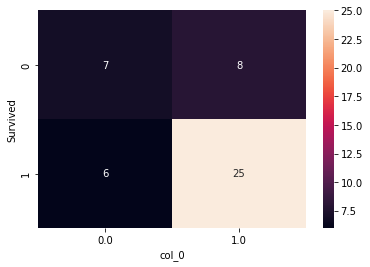



True Negative = 7
True Positive = 25
False Negative = 8
False Positive = 6


In [34]:
#15:
#16: Print the value for TN, TP, FN, and FP
sns.heatmap(cm, annot=True)
plt.show()

TN = cm[0][0]   
TP = cm[1][1]

FN = cm[1][0]
FP = cm[0][1]

print('\n\nTrue Negative =', TN)
print('True Positive =', TP)
print('False Negative =', FN)
print('False Positive =', FP)

In [35]:
#17:
print('\n\nAccuracy =', round((TP + TN)/ (TP +TN + FN + FP),2))
# accuracy_score(y_test,y_pred)



Accuracy = 0.7


In a ROC curve, a higher X-axis value indicates a higher number of False positives than True negatives. While a higher Y-axis value indicates a higher number of True positives than False negatives. ... Meaning the number of incorrectly Negative class points is lower compared to the previous threshold.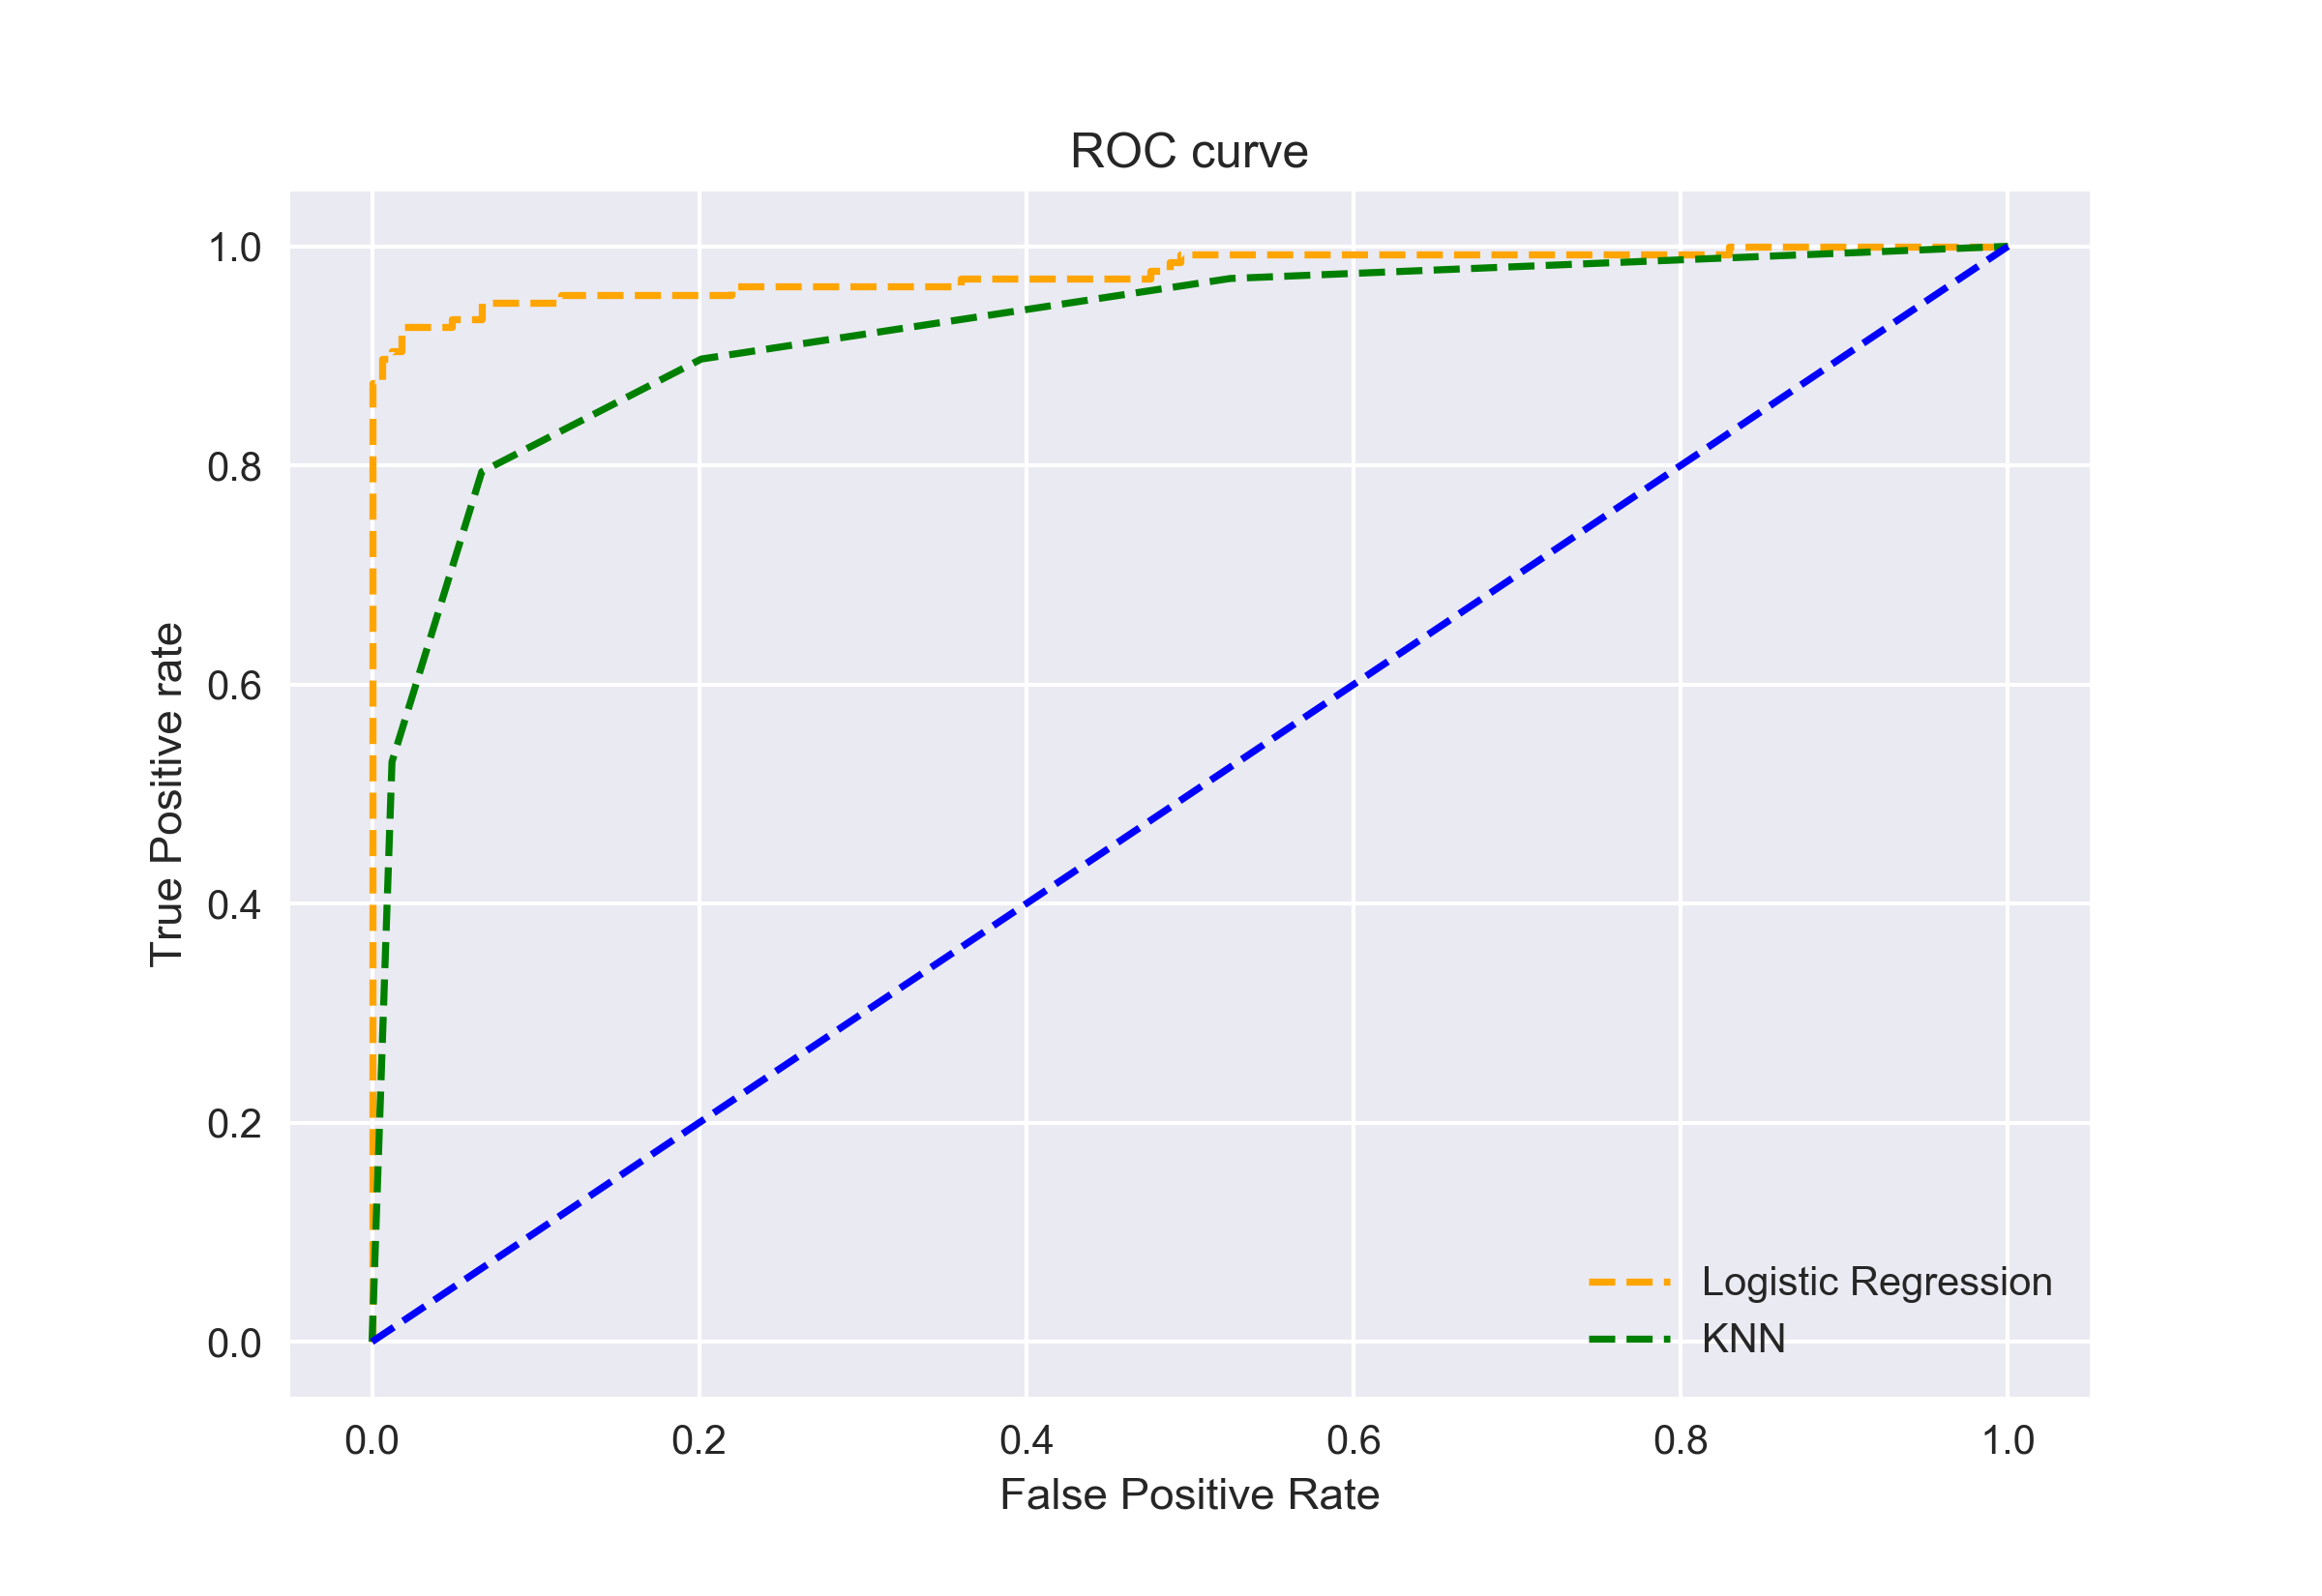

(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic example')

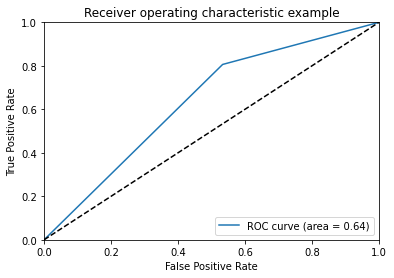

In [36]:
#18:
# Plot ROC curve  ===> Receiver Operating Characteristic Curve (ROC)
plt.clf()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

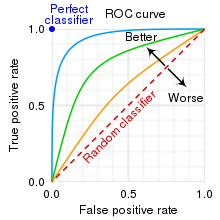

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

Text(0.5, 1.0, 'Distribution of our Predictions')

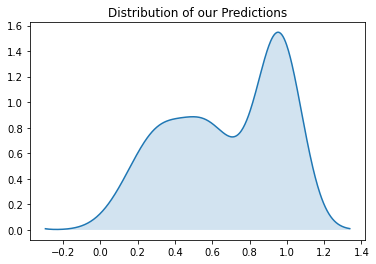

In [37]:
#19: 
kde_res = sm.nonparametric.KDEUnivariate(logitfit.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=0.2)
plt.title("Distribution of our Predictions")

Text(0.5, 0, 'Predicted chance of survival')

Text(0, 0.5, 'Male Gender')

Text(0.5, 1.0, 'The Change of Survival Probability by Gender being Male')

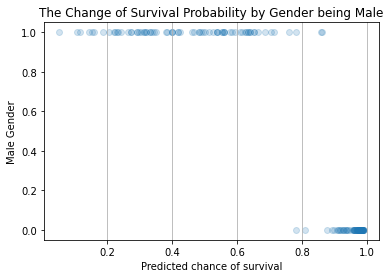

In [38]:
#19:
#  Let's see the prediction distribution based on the male gender: Male = 1, Female = 2 for regression
male = x_train.SexNum==1
plt.scatter(logitfit.predict(),male , alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Male Gender")
plt.title("The Change of Survival Probability by Gender being Male")

Text(0.5, 1.0, 'The Change of Survival Probability by Age')

Text(0.5, 0, 'Predicted chance of survival')

Text(0, 0.5, 'age')

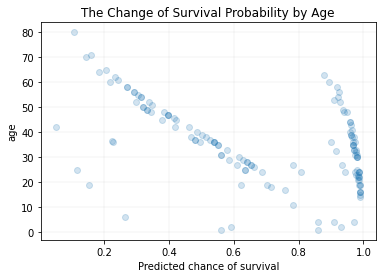

In [39]:
plt.scatter(logitfit.predict(),x_train.Age , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("age")

In [ ]:
#1:
# The Titanic was a British luxury passenger liner that struck an iceberg 
# and sank during its maiden voyage on April 15th, 1912, killing over 1500 people. 
# On the eve of World War One, this tragedy shocked the world and challenged many old 
# ideas about technology, progress, and modern life.

In [ ]:
#2: Age

In [ ]:
#3: Accuracy score gives only the overall accuracy.
# Accuracy can also be measured by area unde the ROC curve.
# Getting a n area of 1 represents a perfect test and area of 0.5 represents the model is as good as a random guess.
# Accuracy = 0.79
# The accuracy is nothing more than the ratio between 
# the well classified samples (true positives and true negatives) and the total number of samples you have.

In [ ]:
#4: 80.3%

In [ ]:
#5: 76.3%

In [ ]:
#6: For every unit increase in Age the log-odds of survival decrease by -0.011 i.e. 
# the chances of survival decrease as passenger age increases.

In [ ]:
#7: R-squared is always between 0 and 100%: 0% represents a model that does not 
# explain any of the variation in response around mean.
# 100%  represents a model that explains all of the variation in the response variable around its mean.

In [ ]:
#8: True

In [ ]:
#9: True

In [ ]:
#10: True

**How to Calculate Standardized Residuals**

A residual is the difference between an observed value and a predicted value in a regression model.
It is calculated as:
Residual = Observed value – Predicted value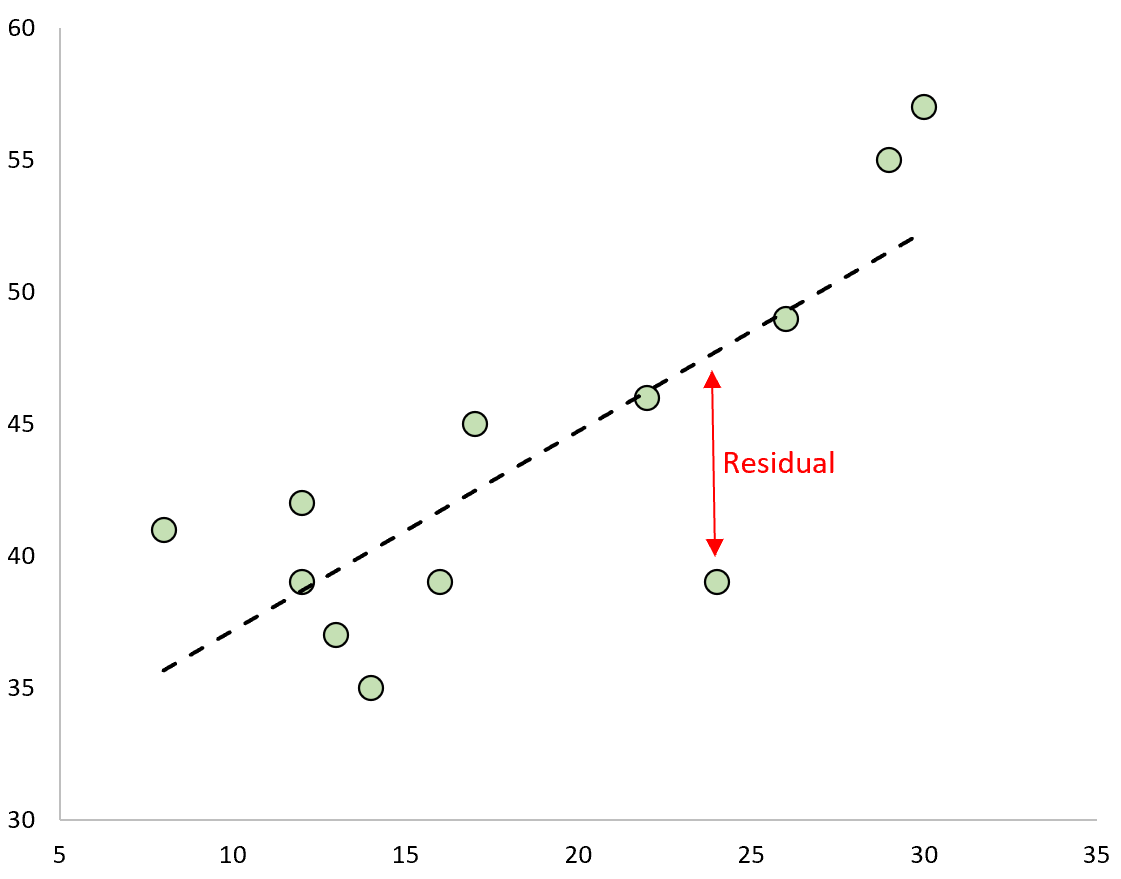

Alpha is a threshold value used to judge whether a test statistic is statistically significant. It is chosen by the researcher. Alpha represents an acceptable probability of a Type I error in a statistical test. Because alpha corresponds to a probability, it can range from 0 to 1.